In [24]:
import pandas as pd
import numpy as np
import time
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
random_state=0

In [25]:
df= pd.read_csv('studentmath.csv')

In [26]:
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [27]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

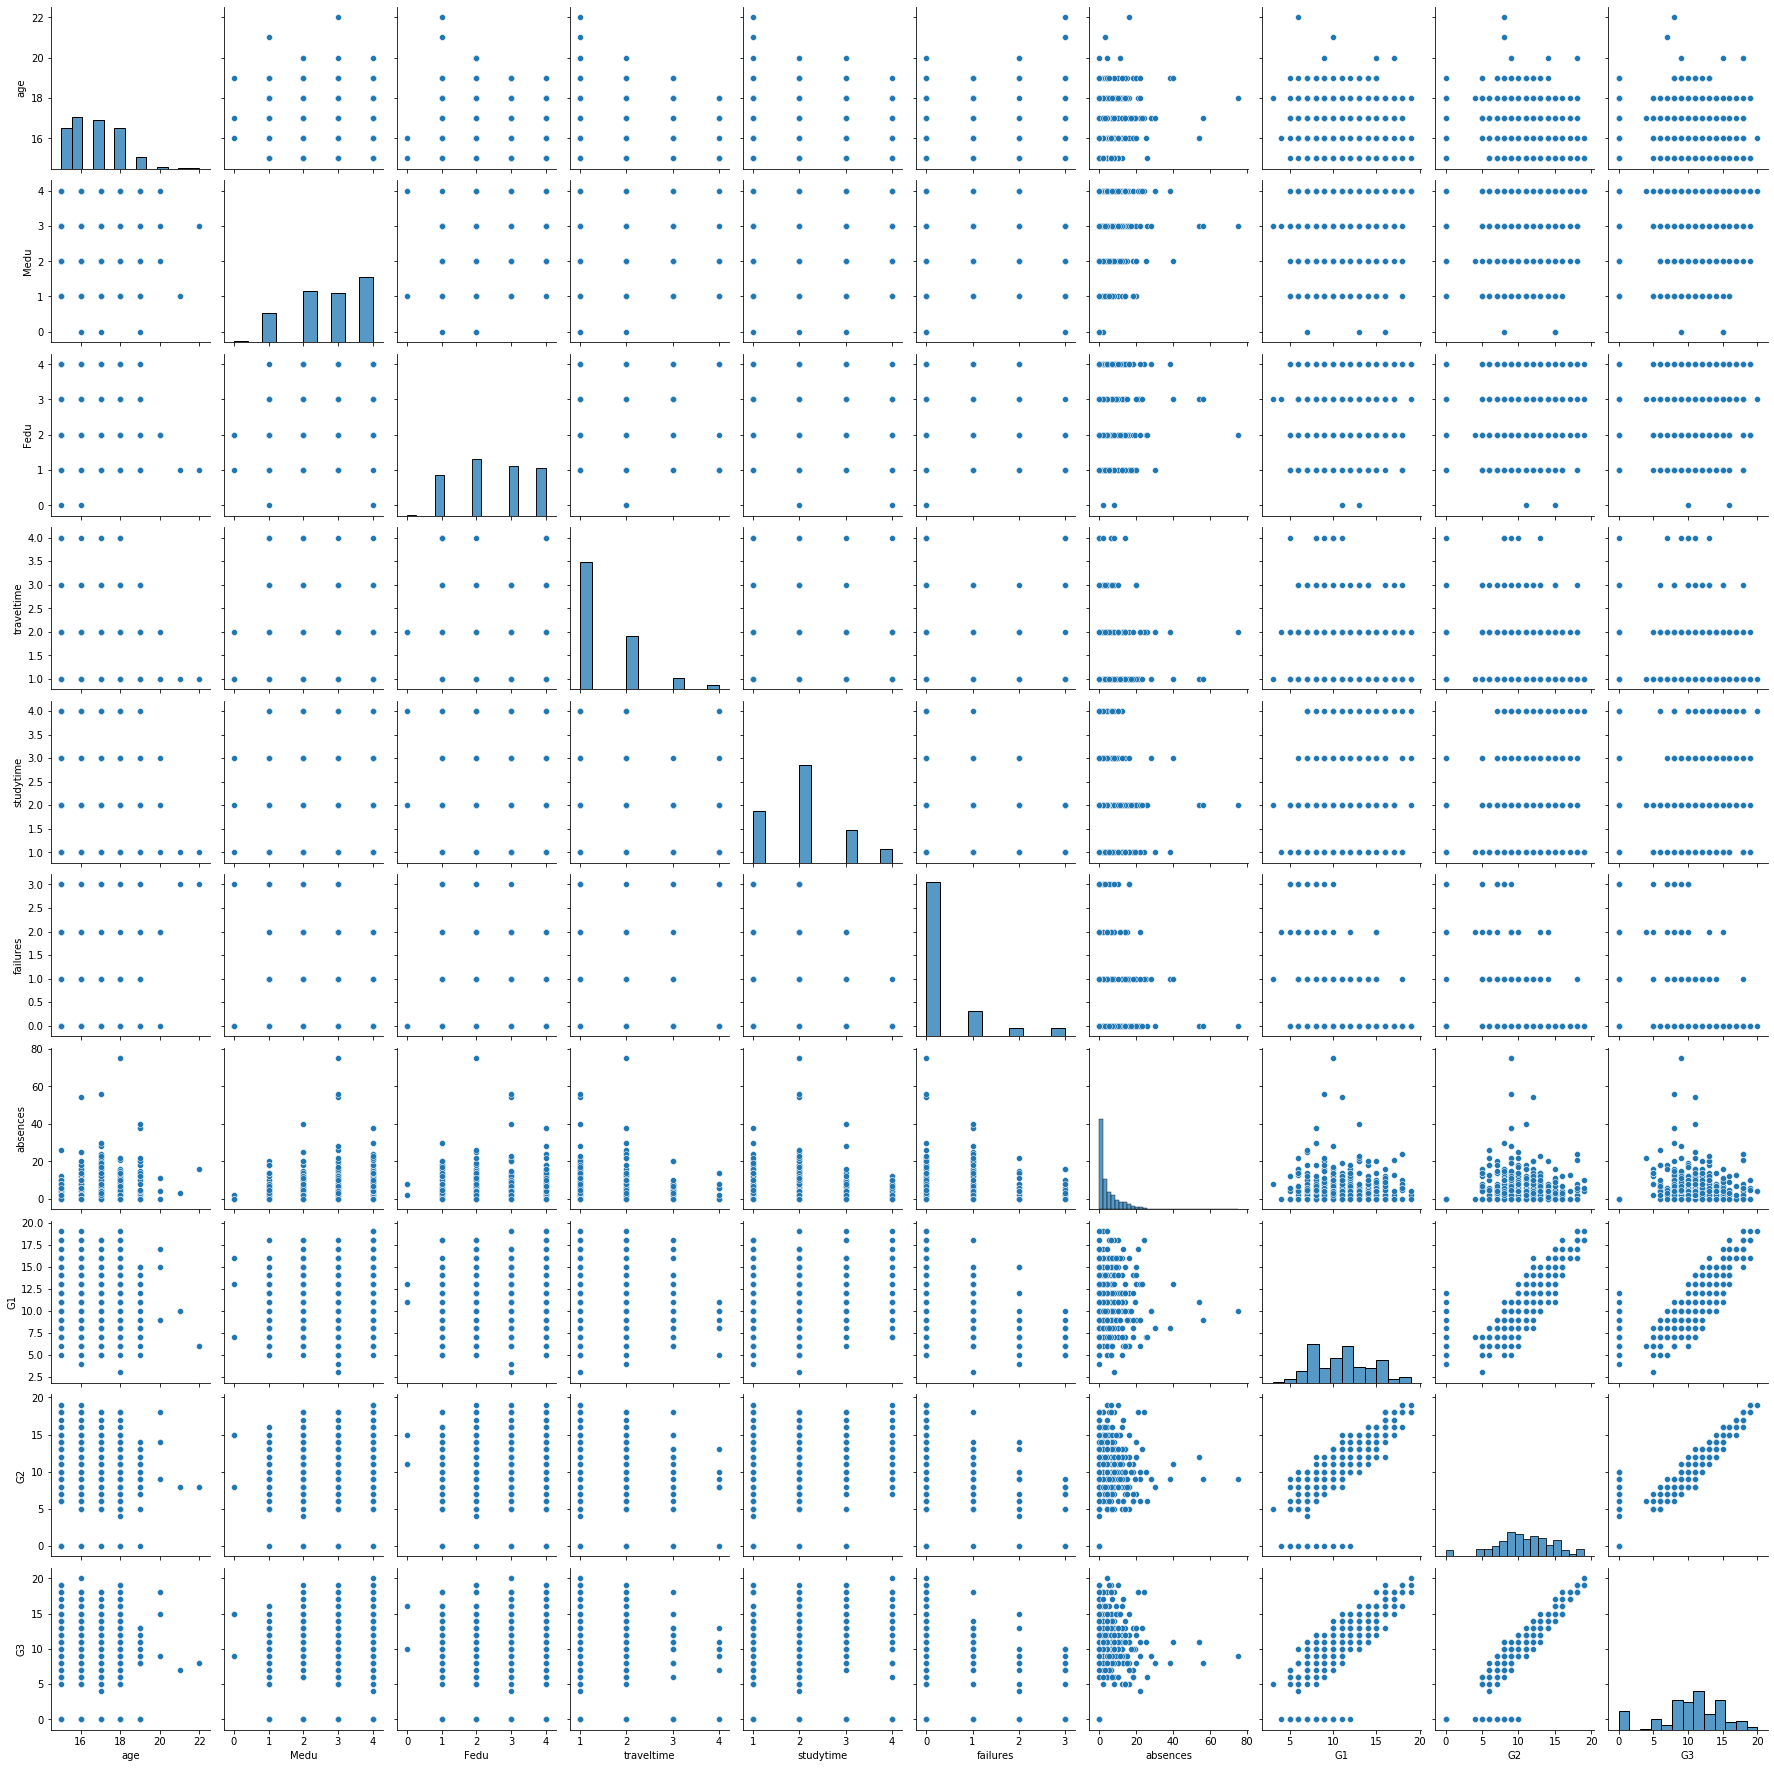

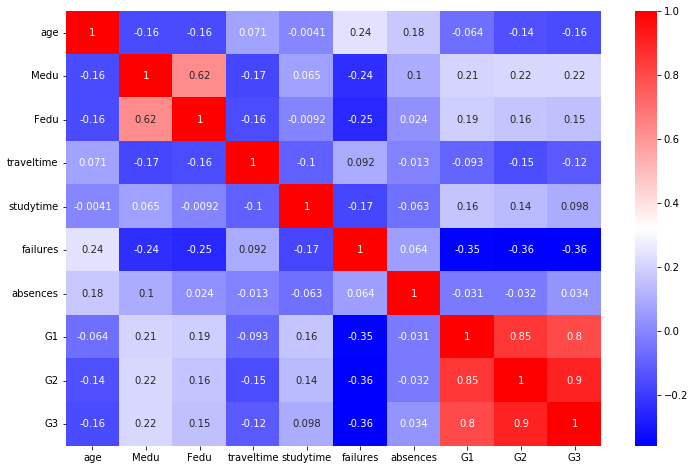

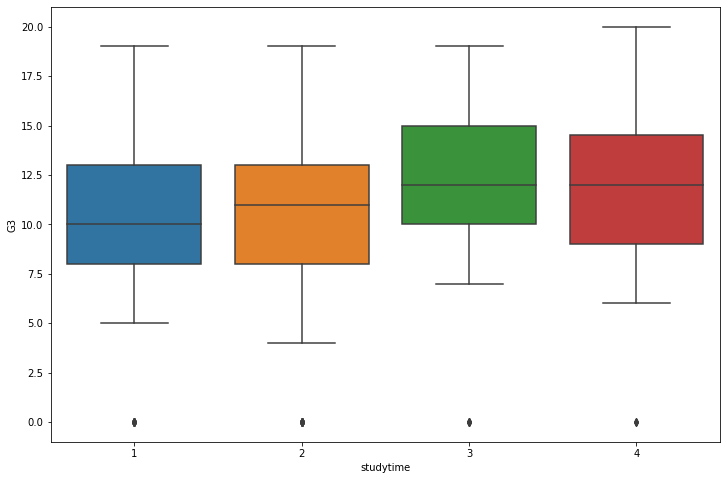

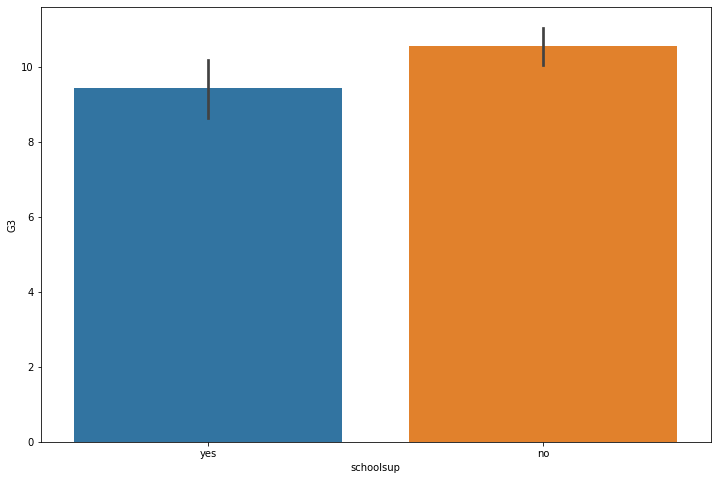

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot for selected numerical features
selected_features = ["age", "Medu", "Fedu", "traveltime", "studytime", "failures", "absences", "G1", "G2", "G3"]
sns.pairplot(df[selected_features])
plt.savefig("pairplot_student_performance.pdf", bbox_inches="tight")
plt.show()

# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df[selected_features].corr(), annot=True, cmap="bwr")
plt.savefig("heatmap_student_performance.pdf", bbox_inches="tight")
plt.show()

# Box plot for final grade (G3) by study time
plt.figure(figsize=(12, 8))
sns.boxplot(x="studytime", y="G3", data=df)
plt.savefig("boxplot_studytime_G3.pdf", bbox_inches="tight")
plt.show()

# Bar plot for final grade (G3) by school support
plt.figure(figsize=(12, 8))
sns.barplot(x="schoolsup", y="G3", data=df)
plt.savefig("barplot_schoolsupport_G3.pdf", bbox_inches="tight")
plt.show()


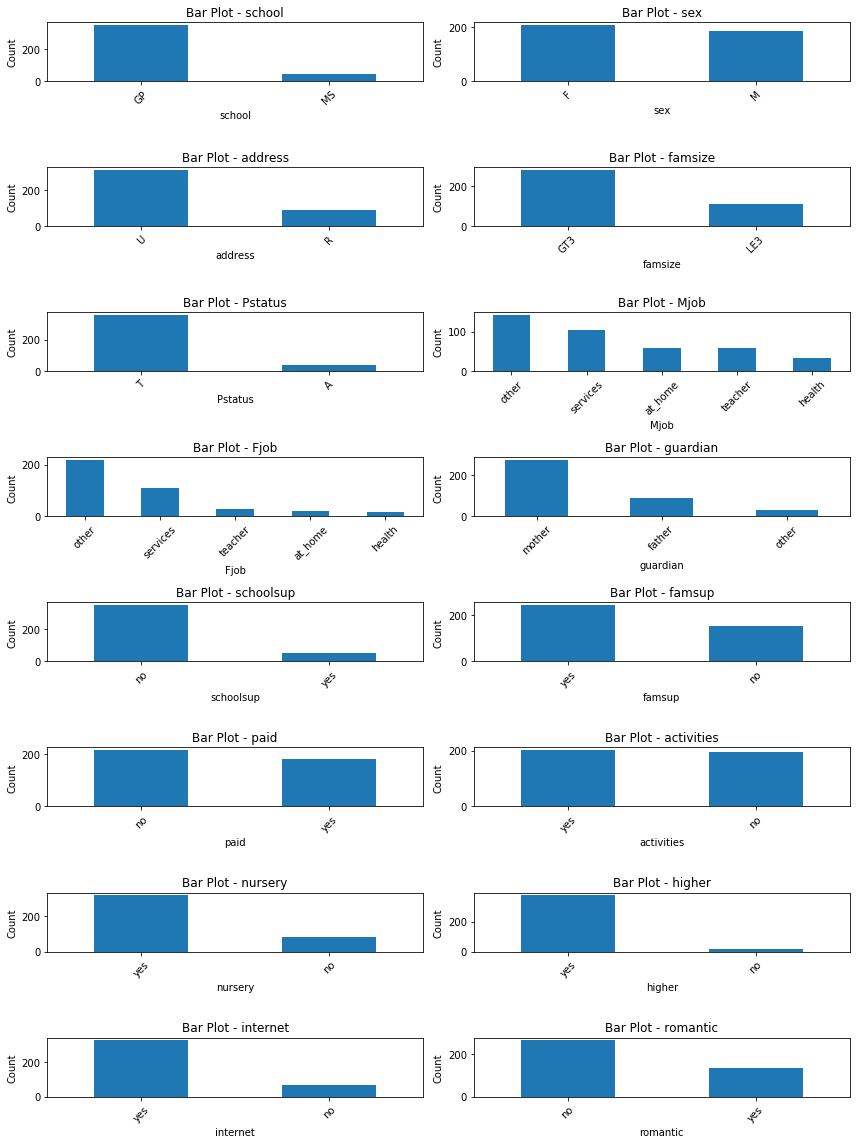

In [32]:
# Define the categorical variables
categorical_vars = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'guardian',
                    'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# Calculate the number of rows and columns for subplots
num_plots = len(categorical_vars)
num_rows = int(num_plots / 2) + num_plots % 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 16))

# Iterate over categorical variables and create bar plots
for idx, var in enumerate(categorical_vars):
    row = idx // num_cols
    col = idx % num_cols

    df[var].value_counts().plot(kind='bar', ax=axes[row, col])
    axes[row, col].set_title(f'Bar Plot - {var}', fontsize=12)
    axes[row, col].set_xlabel(var, fontsize=10)
    axes[row, col].set_ylabel('Count', fontsize=10)
    axes[row, col].tick_params(axis='x', labelrotation=45)

# Adjust the layout
plt.tight_layout()
plt.savefig("studentcategorical.pdf", bbox_inches="tight")

# Show the plot
plt.show()


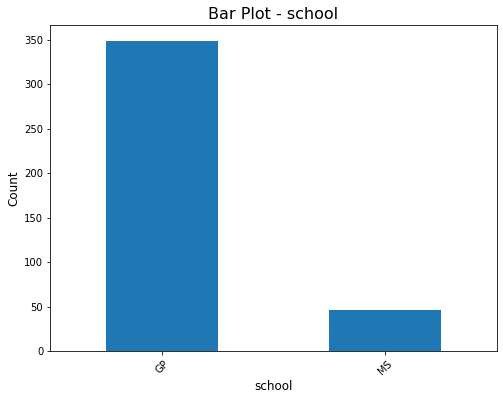

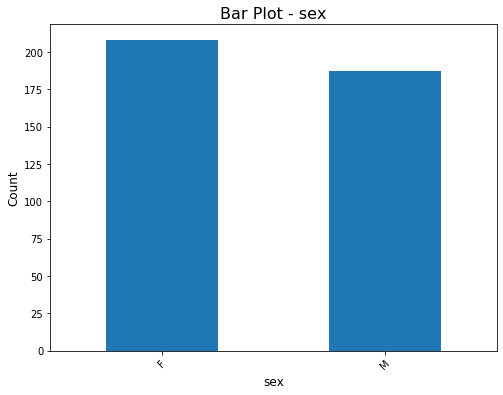

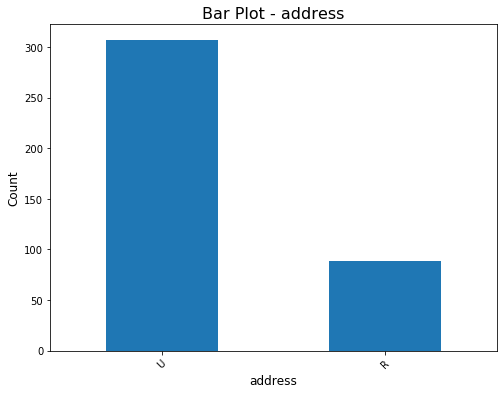

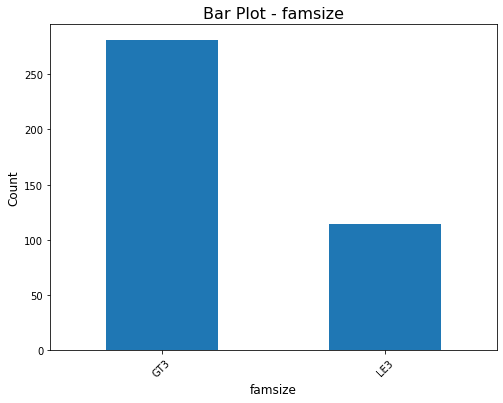

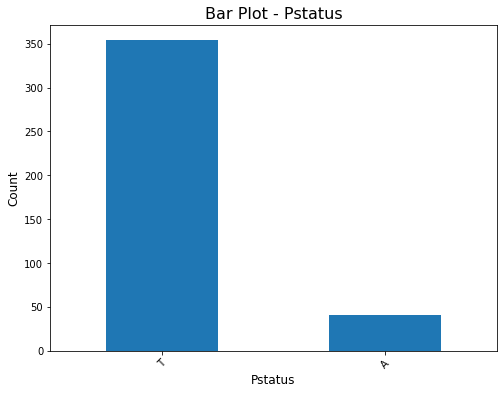

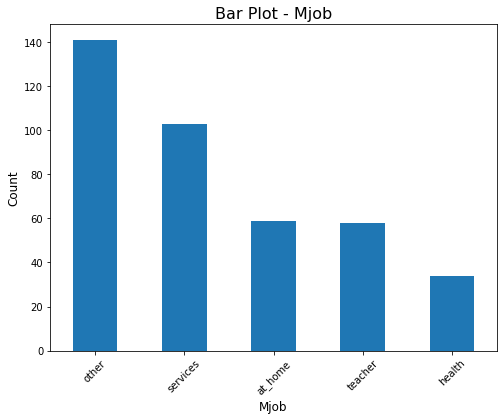

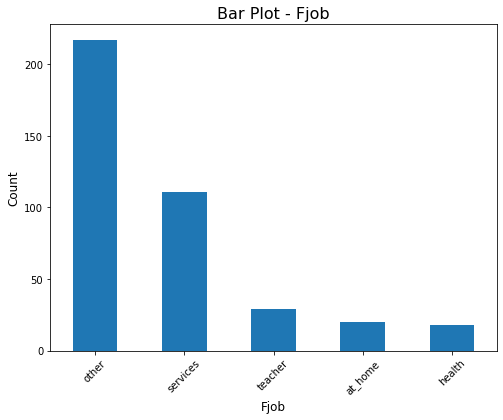

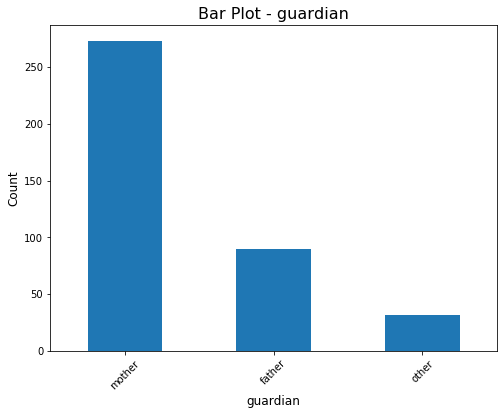

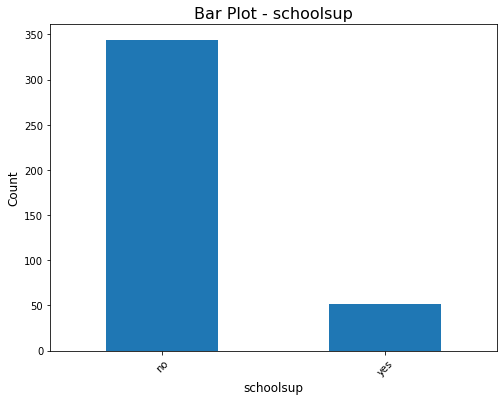

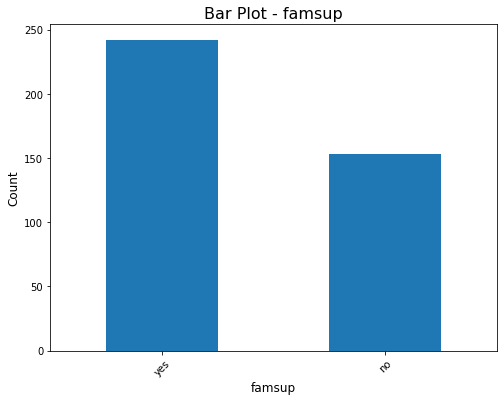

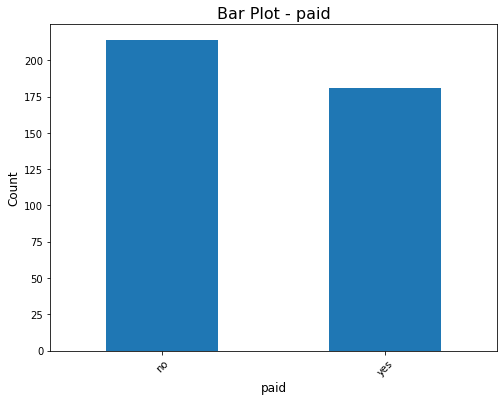

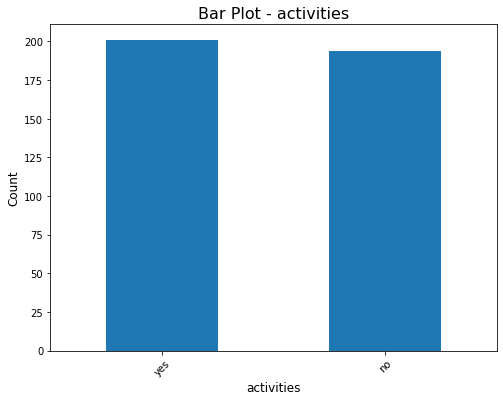

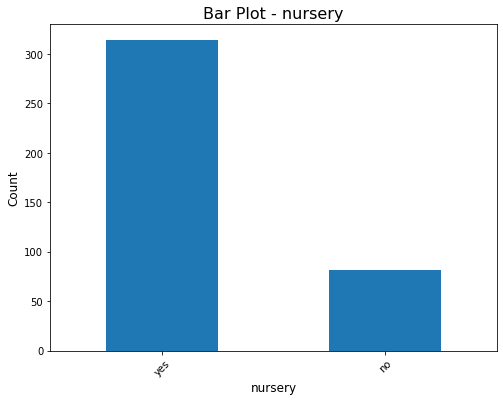

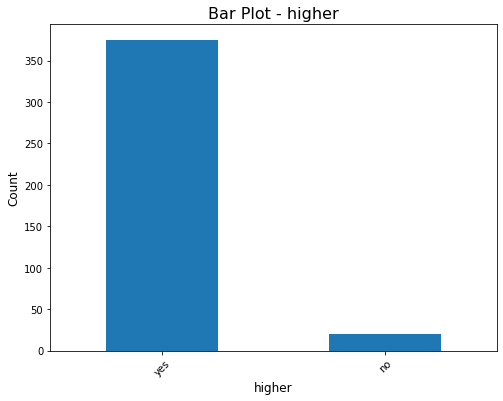

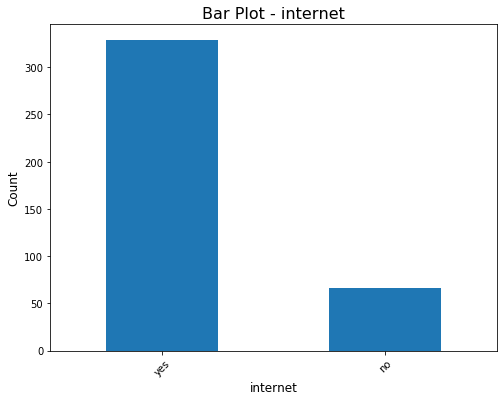

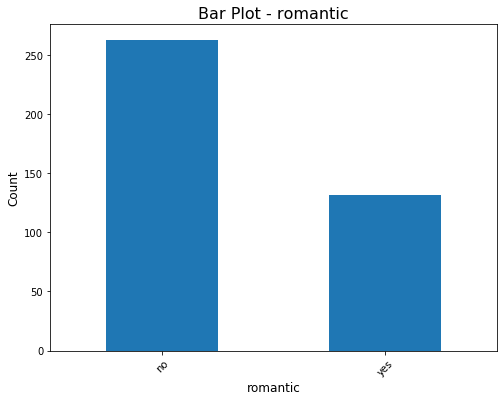

In [30]:
# Define the categorical variables
categorical_vars = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'guardian',
                    'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# Iterate over categorical variables and create bar plots
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    df[var].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot - {var}', fontsize=16)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.savefig("studentcategory.pdf", bbox_inches="tight")
    plt.show()


In [6]:
# Instantiate a LabelEncoder object
encoder = LabelEncoder()

# Iterate through categorical columns and apply LabelEncoder
for column in df.select_dtypes(include=['object']).columns:
    df[column] = encoder.fit_transform(df[column])

In [7]:
df.head()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       4         3      4     1     1       3         6   5   6   6  
1       5         3      3     1     1       3         4   5   5   6  
2       4         3      2     2     3       3        10   7   8  10  
3       3         2      2     1     1       5         2  15  14  15  
4       4         3      2     1     2       5         4   6  10  10  

[5 rows x 33 columns]

In [8]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [9]:
X = df.iloc[:, :-1] 
y = df.iloc[:, -1] 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20,random_state=0)

# Random Forest
ranf = RandomForestRegressor(random_state=0)
rf = ranf.fit(X_train, y_train)
scores_rf = cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)

y_pred_rf = cross_val_predict(ranf, X_test, y_test)
scores_test_rf = cross_val_score(ranf, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_rf) * -1)

# Decision Tree
dectree = DecisionTreeRegressor(random_state=0)
dt = dectree.fit(X_train, y_train)
scores_dt = cross_val_score(dt, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)

y_pred_dt = cross_val_predict(dectree, X_test, y_test)
scores_test_dt = cross_val_score(dectree, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_dt) * -1)

# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
y_pred_knn = cross_val_predict(knn_model, X_test, y_test)
scores_test_knn = cross_val_score(knn_model, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_knn) * -1)

# Create an XGBoost regressor
xgb_reg = xgb.XGBRegressor(random_state=0)
scores_xgb = cross_val_score(xgb_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
y_pred_xgb = cross_val_predict(xgb_reg, X_test, y_test)
scores_test_xgb = cross_val_score(xgb_reg, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_xgb) * -1)

1.4618571428571427
1.5160714285714285
1.8135714285714286
1.4943300915083715


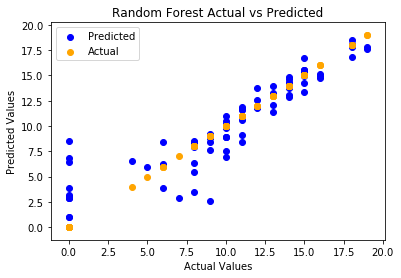

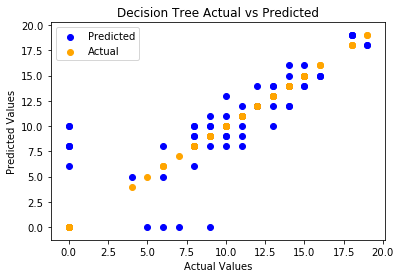

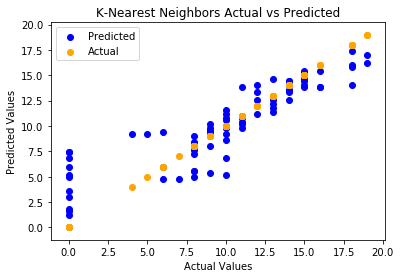

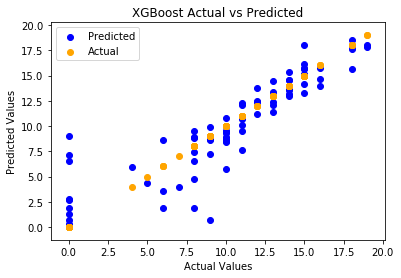

In [10]:
import matplotlib.pyplot as plt

# Create scatterplot for Random Forest
plt.scatter(y_test, y_pred_rf, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='orange', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Actual vs Predicted')
plt.legend()
plt.show()

# Create scatterplot for Decision Tree
plt.scatter(y_test, y_pred_dt, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='orange', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Actual vs Predicted')
plt.legend()
plt.show()

# Create scatterplot for K-Nearest Neighbors
plt.scatter(y_test, y_pred_knn, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='orange', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('K-Nearest Neighbors Actual vs Predicted')
plt.legend()
plt.show()

# Create scatterplot for XGBoost
plt.scatter(y_test, y_pred_xgb, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='orange', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Actual vs Predicted')
plt.legend()
plt.show()


In [11]:
X1=X
X1

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    0   18        1        0        0     4     4     0     4  ...   
1         0    0   17        1        0        1     1     1     0     2  ...   
2         0    0   15        1        1        1     1     1     0     2  ...   
3         0    0   15        1        0        1     4     2     1     3  ...   
4         0    0   16        1        0        1     3     3     2     2  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
390       1    1   20        1        1        0     2     2     3     3  ...   
391       1    1   17        1        1        1     3     1     3     3  ...   
392       1    1   21        0        0        1     1     1     2     2  ...   
393       1    1   18        0        1        1     3     2     3     2  ...   
394       1    1   19        1        1        1     1     1     2     0  ...   

     romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  
0           0       4         3      4     1     1       3         6   5   6  
1           0       5         3      3     1     1       3         4   5   5  
2           0       4         3      2     2     3       3        10   7   8  
3           1       3         2      2     1     1       5         2  15  14  
4           0       4         3      2     1     2       5         4   6  10  
..        ...     ...       ...    ...   ...   ...     ...       ...  ..  ..  
390         0       5         5      4     4     5       4        11   9   9  
391         0       2         4      5     3     4       2         3  14  16  
392         0       5         5      3     3     3       3         3  10   8  
393         0       4         4      1     3     4       5         0  11  12  
394         0       3         2      3     3     3       5         5   8   9  

[395 rows x 32 columns]

In [12]:
X1.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [13]:
def normalize_columns(X1, columns_to_normalize):
    result = X1.copy()
    for feature_name in columns_to_normalize:
        max_value = X1[feature_name].max()
        min_value = X1[feature_name].min()
        result[feature_name] = (X1[feature_name] - min_value) / (max_value - min_value)
    return result

# Assuming you have a DataFrame called 'X1'
# Select the columns you want to normalize
columns_to_normalize = ['age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
       'guardian', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2']

# Normalize the specified columns in the DataFrame
X = normalize_columns(X1, columns_to_normalize)

print(X)

     school  sex       age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
0         0    0  0.428571      1.0        0        0  1.00  1.00  0.00  1.00   
1         0    0  0.285714      1.0        0        1  0.25  0.25  0.00  0.50   
2         0    0  0.000000      1.0        1        1  0.25  0.25  0.00  0.50   
3         0    0  0.000000      1.0        0        1  1.00  0.50  0.25  0.75   
4         0    0  0.142857      1.0        0        1  0.75  0.75  0.50  0.50   
..      ...  ...       ...      ...      ...      ...   ...   ...   ...   ...   
390       1    1  0.714286      1.0        1        0  0.50  0.50  0.75  0.75   
391       1    1  0.285714      1.0        1        1  0.75  0.25  0.75  0.75   
392       1    1  0.857143      0.0        0        1  0.25  0.25  0.50  0.50   
393       1    1  0.428571      0.0        1        1  0.75  0.50  0.75  0.50   
394       1    1  0.571429      1.0        1        1  0.25  0.25  0.50  0.00   

     ...  romantic  famrel 

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet, Value: 0, Mean: 9.306451612903226
Column: internet, Value: 1, Mean: 10.462585034013605
Column: romantic, Value: 0, Mean: 10.725
Column: romantic, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.444444444444445
Column: internet, Value: 0, Mean: 9.258620689655173
Column: internet, Value: 1, Mean: 10.676767676767676
Column: romantic, Value: 0, Mean: 10.881856540084389
Column: romantic, Value: 1, Mean: 9.567796610169491
Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.2

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 6.526315789473684
Column: internet, Value: 0, Mean: 9.274193548387096
Column: internet, Value: 1, Mean: 10.585034013605442
Column: romantic, Value: 0, Mean: 10.729613733905579
Column: romantic, Value: 1, Mean: 9.65040650406504


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.0588235294117645
Column: internet, Value: 0, Mean: 9.385964912280702
Column: internet, Value: 1, Mean: 10.687919463087248
Column: romantic, Value: 0, Mean: 10.85897435897436
Column: romantic, Value: 1, Mean: 9.743801652892563
Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
C

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: romantic, Value: 1, Mean: 9.567796610169491
Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mean: 9.035087719298245
Column: internet, Value: 1, Mean: 10.595317725752508
Column: romantic, Value: 0, Mean: 10.781512605042018
Column: romantic, Value: 1, Mean: 9.466101694915254
Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
C

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mean: 9.035087719298245
Column: internet, Value: 1, Mean: 10.595317725752508
Column: romantic, Value: 0, Mean: 10.781512605042018
Column: romantic, Value: 1, Mean: 9.466101694915254


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mean: 9.365079365079366
Column: internet, Value: 1, Mean: 10.63013698630137
Column: romantic, Value: 0, Mean: 10.813559322033898
Column: romantic, Value: 1, Mean: 9.596638655462185


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941
Column: internet, Value: 0, Mean: 9.75862068965517

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mean: 9.035087719298245
Column: internet, Value: 1, Mean: 10.595317725752508
Column: romantic, Value: 0, Mean: 10.781512605042018
Column: romantic, Value: 1, Mean: 9.466101694915254
Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Co

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet, Value: 0, Mean: 9.306451612903226
Column: internet, Value: 1, Mean: 10.462585034013605
Column: romantic, Value: 0, Mean: 10.725
Column: romantic, Value: 1, Mean: 9.301724137931034


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 6.526315789473684
Column: internet, Value: 0, Mean: 9.274193548387096
Column: internet, Value: 1, Mean: 10.585034013605442
Column: romantic, Value: 0, Mean: 10.729613733905579
Column: romantic, Value: 1, Mean: 9.65040650406504


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]


Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]


Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]


Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]


Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941
Column: internet, Value: 0, Mean: 9.75862068965517

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.7368421052631575
Column: internet, Value: 0, Mean: 9.677966101694915
Column: internet, Value: 1, Mean: 10.5
Column: romantic, Value: 0, Mean: 10.90416666

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.444444444444445
Column: internet, Value: 0, Mean: 9.258620689655173
Column: internet, Value: 1, Mean: 10.676767676767676
Column: romantic, Value: 0, Mean: 10.881856540084389
Column: romantic, Value: 1, Mean: 9.567796610169491
Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 6.526315789473684
Column: internet, Value: 0, Mean: 9.274193548387096
Column: internet, Value: 1, Mean: 10.585034013605442
Column: romantic, Value: 0, Mean: 10.729613733905579
Column: romantic, Value: 1, Mean: 9.65040650406504


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941
Column: internet, Value: 0, Mean: 9.758620689655173
Column: internet, Value: 1, Mean: 10.75084175084175
Column: romantic, Value: 0, Mean: 11.0
Column: romantic, Value: 1, Mean: 9.76271186440678
Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.8321167883211

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941
Column: internet, Value: 0, Mean: 9.758620689655173
Column: internet, Value: 1, Mean: 10.75084175084175
Column: romantic, Value: 0, Mean: 11.0
Column: romantic, Value: 1, Mean: 9.76271186440678
Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.7368421052631575
Column: internet, Value: 0, Mean: 9.677966101694915
Column: internet, Value: 1, Mean: 10.5
Column: romantic, Value: 0, Mean: 10.904166666666667
Column: romantic, Value: 1, Mean: 9.234782608695653
Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 1

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: romantic, Value: 1, Mean: 9.567796610169491
Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, V

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 10.576271186440678
Column: internet, Value: 0, Mean: 9.491803278688524
Column: romantic, Value: 0, Mean: 10.774468085106383
Column: romantic, Value: 1, Mean: 9.644628099173554
Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mean: 9.035087719298245
Column: internet, Value: 1, Mean: 10.595317725752508
Column: romantic, Value: 0, Mean: 10.781512605042018
Column: romantic, Value: 1, Mean: 9.466101694915254
Column: school, Value: 0, Mean: 10.438095238095238
Col

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]


Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]


Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]


Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]


Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 10.576271186440678
Column: internet, Value: 0, Mean: 9.491803278688524
Column: romantic, Value: 0, Mean: 10.774468085106383
Column: romantic, Value: 1, Mean: 9.644628099173554


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mean: 9.035087719298245
Column: internet, Value: 1, Mean: 10.595317725752508
Column: romantic, Value: 0, Mean: 10.781512605042018
Column

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.444444444444445
Column: internet, Value: 0, Mean: 9.258620689655173
Column: internet, Value: 1, Mean: 10.676767676767676
Column: romantic, Value: 0, Mean: 10.881856540084389
Column: romantic, Value: 1, Mean: 9.567796610169491


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet, Value: 0, Mean: 9.306451612903226
Column: internet, Value: 1, Mean: 10.462585034013605
Column: romantic, Value: 0, Mean: 10.725
Column: romantic, Value: 1, Mean: 9.301724137931034


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mean: 9.035087719298245
Column: internet, Value: 1, Mean: 10.595317725752508
Column: romantic, Value: 0, Mean: 10.781512605042018
Column: romantic, Value: 1, Mean: 9.466101694915254


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]


Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]


Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]


Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]


Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]


Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]


Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]


Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]


Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]


Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]


Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]


Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]


Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]


Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]


Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]


Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]


Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]


Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.482315112540192
Column: school, Value: 1, Mean: 9.863636363636363
Column: sex, Value: 0, Mean: 9.890710382513662
Column: sex, Value: 1, Mean: 10.953488372093023
Column: famsize, Value: 0, Mean: 10.208661417322835
Column: famsize, Value: 1, Mean: 10.900990099009901
Column: Pstatus, Value: 0, Mean: 11.0
Column: Pstatus, Value: 1, Mean: 10.336477987421384
Column: schoolsup, Value: 1, Mean: 9.304347826086957
Column: schoolsup, Value: 0, Mean: 10.56957928802589
Column: famsup, Value: 0, Mean: 10.624113475177305
Column: famsup, Value: 1, Mean: 10.261682242990654
Column: paid, Value: 0, Mean: 9.96923076923077
Column: paid, Value: 1, Mean: 10.9375
Column: activities, Value: 0, Mean: 10.300578034682081
Column: activities, Value: 1, Mean: 10.505494505494505
Column: nursery, Value: 1, Mean: 10.514285714285714
Column: nursery, Value: 0, Mean: 10.0
Column: higher, Value: 1, Mean: 10.58753709198813
Column: higher, Value: 0, Mean: 7.0
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.504823151125402
Column: school, Value: 1, Mean: 10.295454545454545
Column: sex, Value: 0, Mean: 10.063492063492063
Column: sex, Value: 1, Mean: 10.951807228915662
Column: famsize, Value: 0, Mean: 10.211155378486056
Column: famsize, Value: 1, Mean: 11.125
Column: Pstatus, Value: 0, Mean: 11.285714285714286
Column: Pstatus, Value: 1, Mean: 10.390625
Column: schoolsup, Value: 1, Mean: 9.976744186046512
Column: schoolsup, Value: 0, Mean: 10.548076923076923
Column: famsup, Value: 0, Mean: 10.683823529411764
Column: famsup, Value: 1, Mean: 10.351598173515981
Column: paid, Value: 0, Mean: 10.095238095238095
Column: paid, Value: 1, Mean: 10.91566265060241
Column: activities, Value: 0, Mean: 10.372093023255815
Column: activities, Value: 1, Mean: 10.579234972677595
Column: nursery, Value: 1, Mean: 10.64516129032258
Column: nursery, Value: 0, Mean: 9.868421052631579
Column: higher, Value: 1, Mean: 10.650887573964496
Column: higher, Value: 0, Mean: 7.058823529411

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.710191082802547
Column: school, Value: 1, Mean: 9.658536585365853
Column: sex, Value: 0, Mean: 10.221621621621622
Column: sex, Value: 1, Mean: 10.988235294117647
Column: famsize, Value: 0, Mean: 10.416
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.411764705882353
Column: Pstatus, Value: 1, Mean: 10.501557632398754
Column: schoolsup, Value: 1, Mean: 9.478260869565217
Column: schoolsup, Value: 0, Mean: 10.754045307443366
Column: famsup, Value: 0, Mean: 10.74074074074074
Column: famsup, Value: 1, Mean: 10.495454545454546
Column: paid, Value: 0, Mean: 10.295336787564766
Column: paid, Value: 1, Mean: 10.938271604938272
Column: activities, Value: 0, Mean: 10.396449704142011
Column: activities, Value: 1, Mean: 10.763440860215054
Column: nursery, Value: 1, Mean: 10.684587813620071
Column: nursery, Value: 0, Mean: 10.236842105263158
Column: higher, Value: 1, Mean: 10.781065088757396
Column: higher, Value: 0, Mean: 6.764705882352941


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.420382165605096
Column: school, Value: 1, Mean: 9.926829268292684
Column: sex, Value: 0, Mean: 9.777777777777779
Column: sex, Value: 1, Mean: 11.03012048192771
Column: famsize, Value: 0, Mean: 10.076
Column: famsize, Value: 1, Mean: 11.047619047619047
Column: Pstatus, Value: 0, Mean: 11.088235294117647
Column: Pstatus, Value: 1, Mean: 10.286604361370717
Column: schoolsup, Value: 1, Mean: 9.41304347826087
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.832116788321168
Column: famsup, Value: 1, Mean: 10.068807339449542
Column: paid, Value: 0, Mean: 9.916666666666666
Column: paid, Value: 1, Mean: 10.889570552147239
Column: activities, Value: 0, Mean: 10.342857142857143
Column: activities, Value: 1, Mean: 10.383333333333333
Column: nursery, Value: 1, Mean: 10.565371024734983
Column: nursery, Value: 0, Mean: 9.569444444444445
Column: higher, Value: 1, Mean: 10.568452380952381
Column: higher, Value: 0, Mean: 6.736842

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.548895899053628
Column: school, Value: 1, Mean: 9.578947368421053
Column: sex, Value: 0, Mean: 10.026881720430108
Column: sex, Value: 1, Mean: 10.905325443786982
Column: famsize, Value: 0, Mean: 10.224409448818898
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.555555555555555
Column: Pstatus, Value: 1, Mean: 10.31974921630094
Column: schoolsup, Value: 1, Mean: 9.416666666666666
Column: schoolsup, Value: 0, Mean: 10.60586319218241
Column: famsup, Value: 0, Mean: 10.602836879432624
Column: famsup, Value: 1, Mean: 10.341121495327103
Column: paid, Value: 0, Mean: 9.938775510204081
Column: paid, Value: 1, Mean: 11.069182389937106
Column: activities, Value: 0, Mean: 10.226190476190476
Column: activities, Value: 1, Mean: 10.641711229946525
Column: nursery, Value: 1, Mean: 10.580071174377224
Column: nursery, Value: 0, Mean: 9.932432432432432
Column: higher, Value: 1, Mean: 10.658753709198812
Column: higher, Value: 0, Mean: 6.4444444

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: school, Value: 0, Mean: 10.579113924050633
Column: school, Value: 1, Mean: 10.025
Column: sex, Value: 0, Mean: 10.137566137566138
Column: sex, Value: 1, Mean: 10.946107784431138
Column: famsize, Value: 0, Mean: 10.264822134387352
Column: famsize, Value: 1, Mean: 11.135922330097088
Column: Pstatus, Value: 0, Mean: 10.972222222222221
Column: Pstatus, Value: 1, Mean: 10.465625
Column: schoolsup, Value: 1, Mean: 9.51063829787234
Column: schoolsup, Value: 0, Mean: 10.669902912621358
Column: famsup, Value: 0, Mean: 10.757575757575758
Column: famsup, Value: 1, Mean: 10.375
Column: paid, Value: 0, Mean: 10.207446808510639
Column: paid, Value: 1, Mean: 10.863095238095237
Column: activities, Value: 0, Mean: 10.464088397790055
Column: activities, Value: 1, Mean: 10.571428571428571
Column: nursery, Value: 1, Mean: 10.6
Column: nursery, Value: 0, Mean: 10.183098591549296
Column: higher, Value: 1, Mean: 10.672566371681416
Column: higher, Value: 0, Mean: 7.411764705882353
Column: internet, Va

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.353503184713375
Column: school, Value: 1, Mean: 9.571428571428571
Column: sex, Value: 0, Mean: 9.718918918918918
Column: sex, Value: 1, Mean: 10.847953216374268
Column: famsize, Value: 0, Mean: 10.0
Column: famsize, Value: 1, Mean: 10.92079207920792
Column: Pstatus, Value: 0, Mean: 11.075
Column: Pstatus, Value: 1, Mean: 10.158227848101266
Column: schoolsup, Value: 1, Mean: 9.177777777777777
Column: schoolsup, Value: 0, Mean: 10.418006430868168
Column: famsup, Value: 0, Mean: 10.464788732394366
Column: famsup, Value: 1, Mean: 10.126168224299066
Column: paid, Value: 0, Mean: 9.776649746192893
Column: paid, Value: 1, Mean: 10.861635220125786
Column: activities, Value: 0, Mean: 10.289772727272727
Column: activities, Value: 1, Mean: 10.233333333333333
Column: nursery, Value: 1, Mean: 10.407801418439716
Column: nursery, Value: 0, Mean: 9.702702702702704
Column: higher, Value: 1, Mean: 10.467261904761905
Column: higher, Value: 0, Mean: 6.8
Column: internet,

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.472843450479234
Column: school, Value: 1, Mean: 9.790697674418604
Column: sex, Value: 0, Mean: 9.946236559139784
Column: sex, Value: 1, Mean: 10.876470588235295
Column: famsize, Value: 0, Mean: 10.2109375
Column: famsize, Value: 1, Mean: 10.85
Column: Pstatus, Value: 1, Mean: 10.272151898734178
Column: Pstatus, Value: 0, Mean: 11.325
Column: schoolsup, Value: 0, Mean: 10.544871794871796
Column: schoolsup, Value: 1, Mean: 9.295454545454545
Column: famsup, Value: 1, Mean: 10.288990825688073
Column: famsup, Value: 0, Mean: 10.55072463768116
Column: paid, Value: 0, Mean: 9.984375
Column: paid, Value: 1, Mean: 10.865853658536585
Column: activities, Value: 0, Mean: 10.248587570621469
Column: activities, Value: 1, Mean: 10.53072625698324
Column: nursery, Value: 0, Mean: 9.75
Column: nursery, Value: 1, Mean: 10.55281690140845
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mean: 7.157894736842105
Column: internet, Value: 1, Mean: 

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: school, Value: 0, Mean: 10.389240506329115
Column: school, Value: 1, Mean: 10.0
Column: sex, Value: 0, Mean: 9.98421052631579
Column: sex, Value: 1, Mean: 10.759036144578314
Column: famsize, Value: 0, Mean: 10.075396825396826
Column: famsize, Value: 1, Mean: 11.0
Column: Pstatus, Value: 0, Mean: 11.210526315789474
Column: Pstatus, Value: 1, Mean: 10.242138364779874
Column: schoolsup, Value: 1, Mean: 9.297872340425531
Column: schoolsup, Value: 0, Mean: 10.504854368932039
Column: famsup, Value: 0, Mean: 10.510791366906474
Column: famsup, Value: 1, Mean: 10.23963133640553
Column: paid, Value: 0, Mean: 9.858638743455497
Column: paid, Value: 1, Mean: 10.909090909090908
Column: activities, Value: 0, Mean: 10.5
Column: activities, Value: 1, Mean: 10.191011235955056
Column: nursery, Value: 1, Mean: 10.43816254416961
Column: nursery, Value: 0, Mean: 9.986301369863014
Column: higher, Value: 1, Mean: 10.547058823529412
Column: higher, Value: 0, Mean: 6.0625
Column: internet, Value: 0, Mea

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-fc01bffdd1ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-17-fc01bffdd1ed>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: school, Value: 0, Mean: 10.438095238095238
Column: school, Value: 1, Mean: 9.731707317073171
Column: sex, Value: 0, Mean: 9.894736842105264
Column: sex, Value: 1, Mean: 10.885542168674698
Column: famsize, Value: 0, Mean: 10.094488188976378
Column: famsize, Value: 1, Mean: 11.009803921568627
Column: Pstatus, Value: 0, Mean: 11.051282051282051
Column: Pstatus, Value: 1, Mean: 10.271293375394322
Column: schoolsup, Value: 1, Mean: 9.46808510638298
Column: schoolsup, Value: 0, Mean: 10.491909385113269
Column: famsup, Value: 0, Mean: 10.654411764705882
Column: famsup, Value: 1, Mean: 10.172727272727272
Column: paid, Value: 0, Mean: 9.82901554404145
Column: paid, Value: 1, Mean: 10.98159509202454
Column: activities, Value: 0, Mean: 10.254237288135593
Column: activities, Value: 1, Mean: 10.458100558659218
Column: nursery, Value: 1, Mean: 10.36896551724138
Column: nursery, Value: 0, Mean: 10.303030303030303
Column: higher, Value: 1, Mean: 10.572700296735905
Column: higher, Value: 0, Mea

<ipython-input-17-fc01bffdd1ed>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-17-fc01bffdd1ed>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]


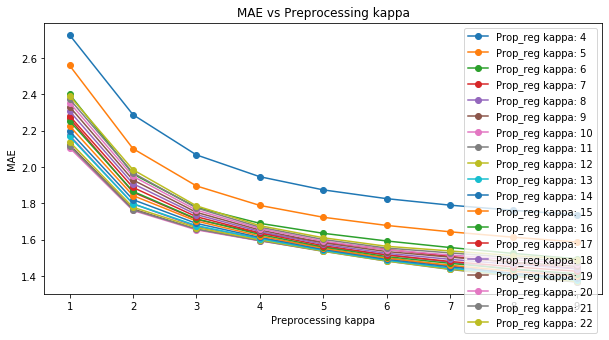

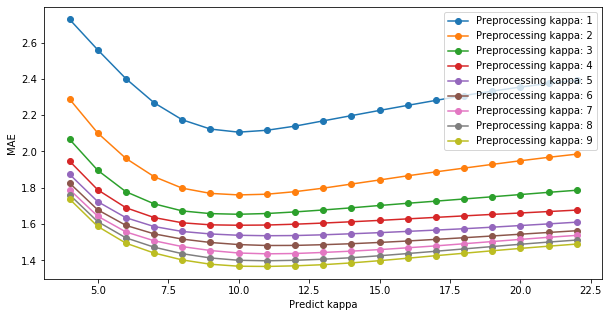

Optimal Preprocessing kappa: 9
Optimal Prop_reg kappa: 11
Minimum MAE: 1.3668127185374326


In [17]:
def preprocess_data(X_train, X_test, y_train, kappa, ordinal_columns):
    X_train, X_test = handle_categorical(X_train, X_test, y_train, ordinal_columns)
    X_train, X_test = handle_ordinal(X_train, X_test, y_train, kappa, ordinal_columns)
    return X_train, X_test


def handle_categorical(X_train, X_test, y_train, ordinal_columns):
    means = {}

    for col in X_train.columns:
        if col not in ordinal_columns:  # Categorical variable
            unique_values_train = X_train[col].unique()
            unique_values_test = X_test[col].unique()

            for val in unique_values_train:
                mean = y_train[X_train[col] == val].mean()
                means[(col, val)] = mean
                print(f"Column: {col}, Value: {val}, Mean: {mean}")

            for val in unique_values_test:
                if val not in unique_values_train:
                    print(f"Warning: Value {val} in column {col} of X_test is not in X_train.")

    for col, val in means:
        X_train.loc[X_train[col] == val, col] = means[(col, val)]
        X_test.loc[X_test[col] == val, col] = means[(col, val)]

    return X_train, X_test


def handle_ordinal(X_train, X_test, y_train, kappa, ordinal_columns):
    missing_values = {}

    for col in X_train.columns:
        if col in ordinal_columns:  # Ordinal variable
            unique_values_train = X_train[col].unique()
            unique_values_test = X_test[col].unique()

            for val in unique_values_test:
                y_train_np = y_train.to_numpy()
                X_train_col_np = X_train[[col]].to_numpy()
                X_test_col_val = val
                l = 0
                v = 0
                for j in range(X_train_col_np.shape[0]):
                    d = abs(X_test_col_val - X_train_col_np[j])
                    l += y_train_np[j] / ((1 + d) ** kappa)
                    v += 1 / ((1 + d) ** kappa)
                imputed_value = l / v
                missing_values[(col, val)] = imputed_value

            for val in unique_values_train:
                if val not in unique_values_test:
                    y_train_np = y_train.to_numpy()
                    X_train_col_np = X_train[[col]].to_numpy()
                    X_train_col_val = val
                    l = 0
                    v = 0
                    for j in range(X_train_col_np.shape[0]):
                        d = abs(X_train_col_val - X_train_col_np[j])
                        l += y_train_np[j] / ((1 + d) ** kappa)
                        v += 1 / ((1 + d) ** kappa)
                    imputed_value = l / v
                    missing_values[(col, val)] = imputed_value

    for col, val in missing_values:
        X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
        X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

    return X_train, X_test



def prop_reg(X_test,X_train,y_train,y_test,kappa):
    d = np.zeros((len(X_test),len(X_train)))
    for i in range(len(X_test)):
        for j in range(len(X_train)):
            d[i,j] = np.linalg.norm(X_test[i]-X_train[j])
    c=np.zeros(len(y_test))
    for i in range(len(y_test)):
        l=0
        v=0
        for j in range(len(y_train)):
            
            l+=y_train[j]/((1+d[i,j])**kappa)
            v+=1/((1+d[i,j])**kappa)
        
        c[i]=l/v
    return(c)


def kfold_cv(X, y, ordinal_columns, kappa_values_preprocessing, kappa_values_prop_reg, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    results = {}
    mae_values_per_kappa = {}

    for kappa_preprocessing in kappa_values_preprocessing:
        for kappa_prop_reg in kappa_values_prop_reg:
            mae_values = []

            for train_index, test_index in kf.split(X):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                X_train_preprocessed, X_test_preprocessed = preprocess_data(X_train, X_test, y_train, kappa_preprocessing, ordinal_columns)
                y_pred = prop_reg(X_test_preprocessed.values, X_train_preprocessed.values, y_train.values, y_test.values, kappa_prop_reg)
                mae = mean_absolute_error(y_test, y_pred)
                mae_values.append(mae)

            results[(kappa_preprocessing, kappa_prop_reg)] = np.mean(mae_values)
            mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)] = mae_values

    return results, mae_values_per_kappa


ordinal_columns = ['age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
       'guardian', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2']

kappa_values_preprocessing = [1,2,3,4,5,6,7,8,9]
kappa_values_prop_reg = [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]

cv_results, mae_values_per_kappa = kfold_cv(X, y, ordinal_columns, kappa_values_preprocessing, kappa_values_prop_reg)


# Plot the MAE vs kappa curve for preprocessing
plt.figure(figsize=(10, 5))
for kappa_prop_reg in kappa_values_prop_reg:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_preprocessing in kappa_values_preprocessing]
    plt.plot(kappa_values_preprocessing, mae_values, '-o', label=f"Prop_reg kappa: {kappa_prop_reg}")

plt.xlabel('Preprocessing kappa')
plt.ylabel('MAE')
plt.title('MAE vs Preprocessing kappa')
plt.legend()
plt.show()

# Plot the MAE vs kappa curve for prop_reg
plt.figure(figsize=(10, 5))
for kappa_preprocessing in kappa_values_preprocessing:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_prop_reg in kappa_values_prop_reg]
    plt.plot(kappa_values_prop_reg, mae_values, '-o', label=f"Preprocessing kappa: {kappa_preprocessing}")

plt.xlabel('Predict kappa')
plt.ylabel('MAE')
plt.legend()
# Save the plot as a PDF
plt.savefig('studentfull_mae_vs_predicting_kappa.pdf', format='pdf')
plt.show()


    # Find the optimal combination of kappa values
optimal_kappa_preprocessing, optimal_kappa_prop_reg = min(cv_results, key=cv_results.get)
optimal_mae = cv_results[(optimal_kappa_preprocessing, optimal_kappa_prop_reg)]

print(f"Optimal Preprocessing kappa: {optimal_kappa_preprocessing}")
print(f"Optimal Prop_reg kappa: {optimal_kappa_prop_reg}")
print(f"Minimum MAE: {optimal_mae}")


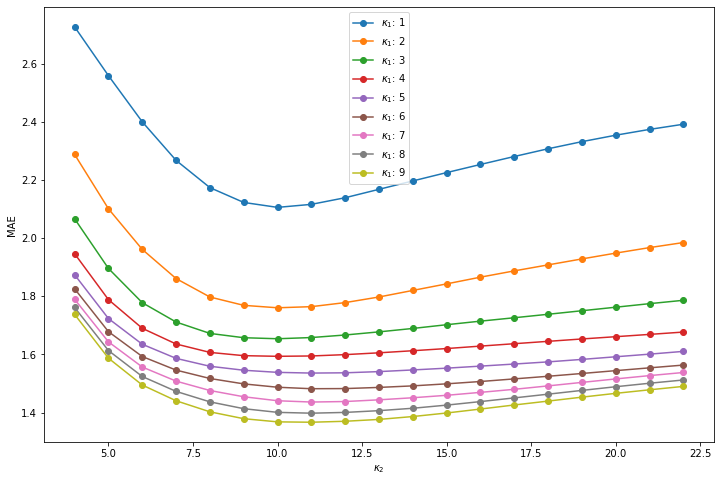

In [21]:
plt.figure(figsize=(12, 8))
for kappa_preprocessing in kappa_values_preprocessing:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_prop_reg in kappa_values_prop_reg]
    plt.plot(kappa_values_prop_reg, mae_values, '-o', label=f"$\\kappa_1$: {kappa_preprocessing}")

plt.xlabel('$\\kappa_2$')
plt.ylabel('MAE')
plt.legend()

# Save the plot as a PDF
plt.savefig('studentfull_mae_vs_predicting_kappa.pdf', format='pdf')

# Show the plot
plt.show()

In [18]:
# Print all the combinations of kappa values and their corresponding MAE values
print("Kappa combinations and their MAE values:")
for (kappa_preprocessing, kappa_prop_reg), mae in cv_results.items():
    print((kappa_preprocessing, kappa_prop_reg, mae))
 
# Print all the combinations of kappa values and their corresponding MAE values
print("Prop_reg kappa and their MAE values:")
for (kappa_preprocessing, kappa_prop_reg), mae in cv_results.items():
    print((kappa_prop_reg, mae))

    

Kappa combinations and their MAE values:
(1, 4, 2.727802082271777)
(1, 5, 2.559879288518163)
(1, 6, 2.4009340046471745)
(1, 7, 2.2682401929478293)
(1, 8, 2.17447484818325)
(1, 9, 2.123440158663481)
(1, 10, 2.1064596300528815)
(1, 11, 2.116868143009109)
(1, 12, 2.139716642750327)
(1, 13, 2.1686434620955457)
(1, 14, 2.197505088934708)
(1, 15, 2.2262030866205214)
(1, 16, 2.2541946145383887)
(1, 17, 2.281597157971728)
(1, 18, 2.3082328195600583)
(1, 19, 2.3326900336708234)
(1, 20, 2.354930578524955)
(1, 21, 2.374890056499232)
(1, 22, 2.3926562451852798)
(2, 4, 2.2885508791506166)
(2, 5, 2.1015525260838857)
(2, 6, 1.9617230640860008)
(2, 7, 1.8613634252483435)
(2, 8, 1.7978798618036993)
(2, 9, 1.7691974116745381)
(2, 10, 1.7608171429877655)
(2, 11, 1.7646768275936846)
(2, 12, 1.7786877045797678)
(2, 13, 1.7979808448157448)
(2, 14, 1.820561982215099)
(2, 15, 1.8431047928210789)
(2, 16, 1.8662194780910517)
(2, 17, 1.8878541391270023)
(2, 18, 1.9084846933328798)
(2, 19, 1.928992782845843)
(2, 

Column: school, Value: 0, Mean: 10.496350364963504
Column: school, Value: 1, Mean: 10.333333333333334
Column: sex, Value: 0, Mean: 9.993939393939394
Column: sex, Value: 1, Mean: 11.0
Column: famsize, Value: 1, Mean: 11.021739130434783
Column: famsize, Value: 0, Mean: 10.25
Column: Pstatus, Value: 1, Mean: 10.410526315789474
Column: Pstatus, Value: 0, Mean: 11.064516129032258
Column: schoolsup, Value: 1, Mean: 9.897435897435898
Column: schoolsup, Value: 0, Mean: 10.555956678700362
Column: famsup, Value: 0, Mean: 10.664
Column: famsup, Value: 1, Mean: 10.350785340314136
Column: paid, Value: 0, Mean: 10.087719298245615
Column: paid, Value: 1, Mean: 10.931034482758621
Column: activities, Value: 1, Mean: 10.606060606060606
Column: activities, Value: 0, Mean: 10.331125827814569
Column: nursery, Value: 1, Mean: 10.634146341463415
Column: nursery, Value: 0, Mean: 9.914285714285715
Column: higher, Value: 1, Mean: 10.631229235880399
Column: higher, Value: 0, Mean: 7.333333333333333
Column: inter

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-14-f4b119070d3d>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

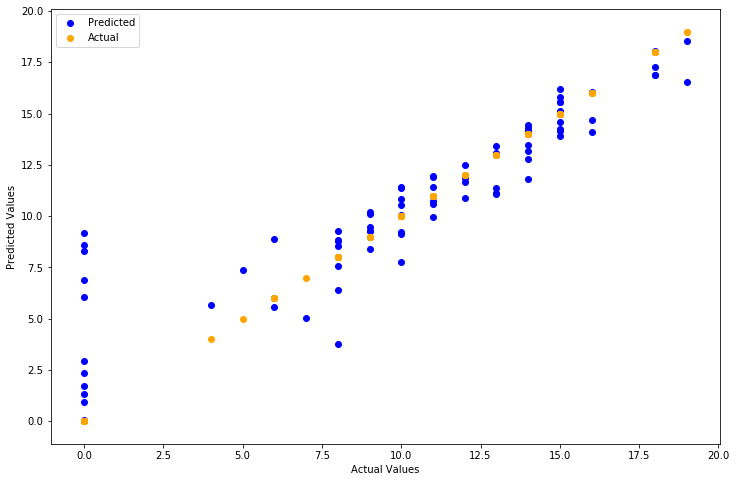

In [16]:
# Preprocess the data using the optimal_kappa_preprocessing
X_train_preprocessed, X_test_preprocessed = preprocess_data(X_train, X_test, y_train, optimal_kappa_preprocessing, ordinal_columns)

# Apply the prop_reg function with the optimal_kappa_prop_reg
y_pred = prop_reg(X_test_preprocessed.values, X_train_preprocessed.values, y_train.values, y_test.values, optimal_kappa_prop_reg)

# Create scatterplot for the proposed method
plt.figure(figsize=(12,8))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='orange', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.savefig('studentfullpredictvsactual.pdf', format='pdf')
plt.show()


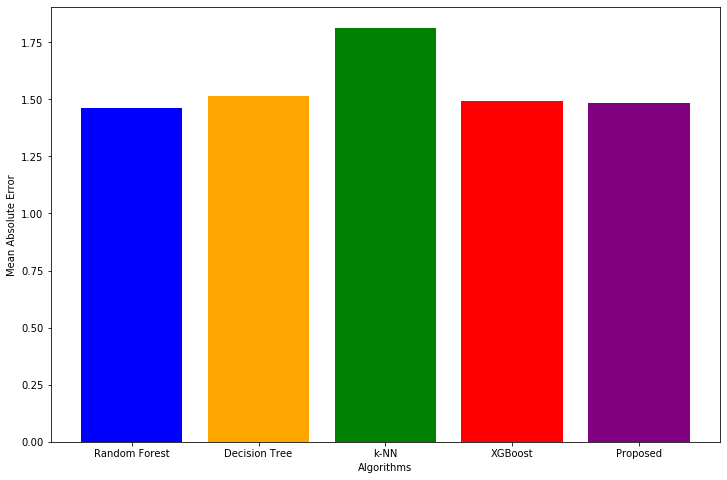

In [22]:
# Results data
results = {
    'Random Forest': 1.462,
    'Decision Tree': 1.516,
    'k-NN': 1.814,
    'XGBoost': 1.494,
    'Proposed': 1.482,
}

# Plot the bar graph
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(results.keys(), results.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
ax.set_xlabel('Algorithms')
ax.set_ylabel('Mean Absolute Error')

# Save the plot as a PDF
plt.savefig('studentfullresults_bar_graph.pdf', format='pdf')

# Show the plot
plt.show()